In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 8.)})
sns.set_style('whitegrid')

In [4]:
televisiones = pd.read_csv('../data/teles.csv')

## Veamos la distribución de precios diferenciando por tecnología y resolución

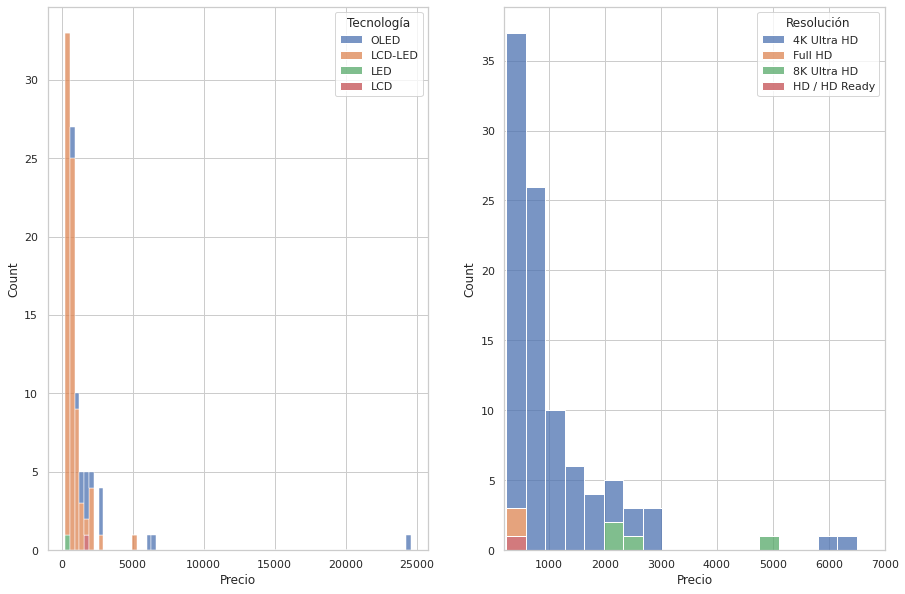

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
sns.histplot(x=televisiones['Precio'], hue=televisiones['Tecnología'], multiple='stack', ax=axs[0])
plt.xlim(200,7000)
sns.histplot(x=televisiones['Precio'], hue=televisiones['Resolución'], multiple='stack', ax=axs[1])
plt.xlim(200,7000)
plt.savefig('../data/pricebytecandres.png')

## Comparamos precios por marca

In [5]:
pormarca = televisiones.groupby('Marca').mean().reset_index()

In [6]:
pormarca

,Marca,Unnamed: 0,Precio,Tamaño,Distancia,HDMI
0,CHIQ,59.000000,245.990000,40.000000,NaN,3.000000
1,HISENSE,52.533333,712.445333,58.933333,1.771538,3.357143
2,LG,35.485714,1906.776857,60.382353,1.800357,3.264706
3,PHILIPS,66.000000,493.158333,46.500000,1.415000,4.000000
4,SAMSUNG,66.625000,1440.001250,62.062500,1.767000,3.187500
5,SILVER,39.500000,509.525000,52.500000,1.670000,2.750000
6,SMART,13.333333,308.656667,48.333333,1.500000,3.000000
7,SONY,56.941176,1409.859412,58.176471,1.741250,4.000000
8,XIAOMI,36.000000,469.990000,55.000000,1.680000,3.000000


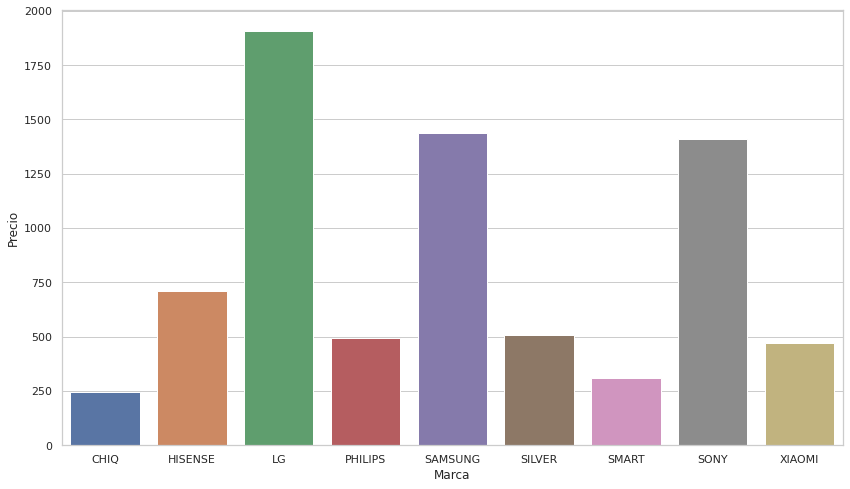

In [7]:
sns.barplot(y=pormarca['Precio'],x=pormarca['Marca'])
plt.savefig('../data/pricebymarca.png')

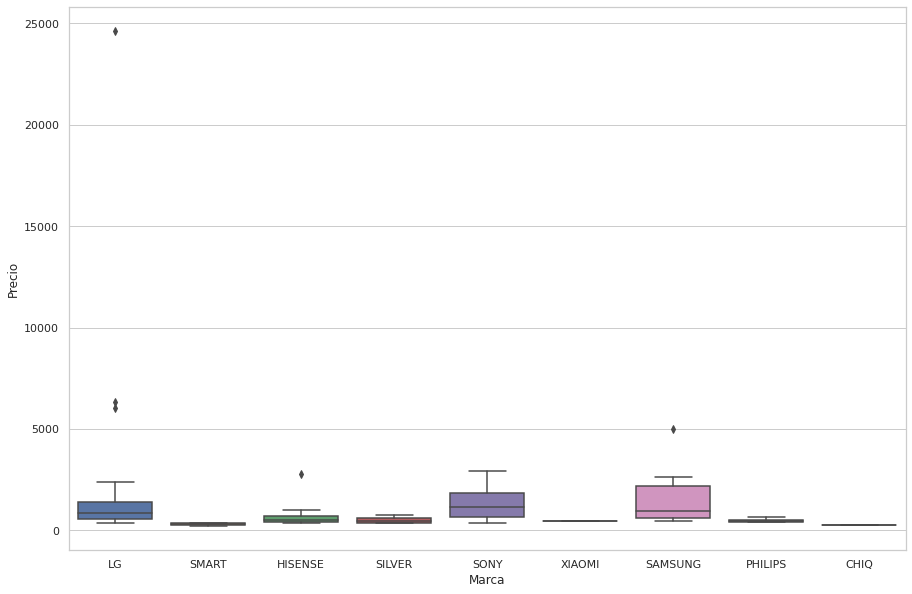

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.boxplot(x=televisiones['Marca'], y=televisiones['Precio'])

plt.savefig('../data/boxplotmarcabueno.png')

## El precio es directamente proporcional al tamaño

In [14]:
televisiones

,Unnamed: 0,Modelo,Precio,Tamaño,Distancia,Tecnología,Resolución,Smart TV,Sonido,Altavoces,HDMI,Marca
0,0,TV LG 55C15 (OLED - 55'' - 140 cm - 4K Ultra H...,1249.00,55.0,1.68,OLED,4K Ultra HD,Sí,40 W,2.2,4.0,LG
1,1,TV LG 65C15 (OLED - 65'' - 165 cm - 4K Ultra H...,1599.00,65.0,1.98,OLED,4K Ultra HD,Sí,40 W,2.2,4.0,LG
2,2,TV LG 48C15 (OLED - 48'' - 122 cm - 4K Ultra H...,1890.89,48.0,1.49,OLED,4K Ultra HD,Sí,40 W,2.2,4.0,LG
3,3,TV LG 55G16 (OLED - 55'' - 140 cm - 4K Ultra H...,1495.00,55.0,1.68,OLED,4K Ultra HD,Sí,60 W,4.2,4.0,LG
4,4,TV LG 55UP77006LB (LED - 55'' - 140 cm - 4K Ul...,469.00,55.0,1.68,LCD-LED,4K Ultra HD,Sí,20 W,2.0,2.0,LG
...,...,...,...,...,...,...,...,...,...,...,...,...
93,93,TV SAMSUNG UE75TU7025 (LED - 75'' - 189 cm - 4...,1099.00,75.0,NaN,LCD-LED,4K Ultra HD,Sí,20W,2.0,2.0,SAMSUNG
94,94,TV HISENSE 43A7500F (LED - 43'' - 109 cm - 4K ...,405.97,43.0,1.31,LCD-LED,4K Ultra HD,Sí,14 W,2.0,4.0,HISENSE
95,95,TV SONY KD-43XH8596 (Caja Abierta - LED - 43''...,445.77,43.0,1.31,LCD-LED,4K Ultra HD,Sí,20 W,2.0,4.0,SONY
96,96,TV LG 55SJ810V (Caja Abierta - LED - 55'' - 14...,497.97,55.0,NaN,NaN,4K Ultra HD,Apps y Web Browsing,NaN,Sí,4.0,LG


In [19]:
finales = televisiones.loc[(televisiones.Precio < 650) & (televisiones.Tamaño == 55.0)&(televisiones.Marca != 'LG')&(televisiones.Marca !='SAMSUNG')& (televisiones.Marca != 'SONY')].sort_values(by=['Precio'])

In [28]:
finales.set_index('Unnamed: 0',inplace=True)

In [29]:
finales.to_csv('../data/elegidas.csv')